Website Link: https://chriscallahan99.github.io/DataScience_Final_Project/ 

![usaid.jpg](docs/assets/usaid.jpg)    


<div style="text-align: center;">
<h1>How does US Foreign Aid Impact Health Outcomes?</h1>  
<br>
By Chris Callahan and Mikey Sison
</div>


<div style="text-align: center;">
1. Introduction<br>
2. Data: Extraction, Transform and Load<br>
3. Exploratory Data Analysis<br>
4. Model and Analysis<br>
5. Conclusion<br>
6. Appendix<br>
</div>

___

<div style="text-align: center;">
    <h2>Introduction</h2>
</div>

### Abstract

The United States disburses the most foreign aid in the world ([World Economic Forum](https://www.weforum.org/agenda/2016/08/foreign-aid-these-countries-are-the-most-generous/ 'Foreign aid')) and it is of paramount importance that the countries who are in greatest need are able to get it. We examine US foreign aid disbursements to six countires of middle to low economic rank to determine the effect of monetary aid increases on five health indicators representative of overall health outcomes. The countries of Ethiopia, El Salvador, Ecuador, Haiti, Moldova, and Yemen represent a sample of countries exhibiting some of the greatest overall need for humanitarian aid. Geopolitical and environmental factors have rendered Ethiopia, Haiti, and Yemen dependent on foreign aid for humanitarian support. It is anecdotally acknowledged that overall increases in foreign aid disbursements would have a positive increase in overall welfare. We aim to determine which US Agencies have the greatest direct impact on improving health indicators. 
                
Our analysis will explore and answer the following questions:
* How does US foreign aid impact the overall health of a country? 
* Does a \$1 marginal dollar increase to one country increase health indicators more or less than different country? 
* Since US agencies have budgets set by Congress, how can they better utilize a limited budget with the maximum impact?
* Is change in an indicator dependent on marginal dollar increases per agency?
     
___

<div style="text-align: center;">
    <h2>Data: Extraction, Transform, and Load</h2>
</div>





### Imports
For this project, we utilized the python libraries pandas, maplotlib, numpy, and more. The first few code cells will be installing seaborn, a plotting library, and importing other necessary libraries.

In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
## IMPORTS ##

# Load Numpy
import numpy as np

# Load os
import os

# Load Pandas
import pandas as pd

# Load MatPlotLib
import matplotlib
import matplotlib.pyplot as plt

# Load Seaborn
import seaborn as sns; sns.set_theme()

# These two things are for Pandas, it widens the notebook and lets us display data easily.
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

Let's change the directory to the folder containing the foreign aid data.

In [3]:
os.chdir("Foreign-Aid-Country-Data")

### Data Sourcing & Extraction
We obtained data from two primary sources:  [US Gov Foreign Assistance](https://foreignassistance.gov/) and
[WHO GW13 Dataset](https://www.who.int/data/inequality-monitor/data#PageContent_C160_Col00). These two datasets contain the publicly avaliable US foreign aid disbursements per country and health indicators by country over the past 20 years, respectively.

#### Foreign Aid by Country

Our first dataset comes from the [US Foreign Assistance](https://foreignassistance.gov/) webpage. With this dataset, we will be focusing on quantifying the amount of foreign aid the United States gives to the six countries in question, per year, and which agencies provide this support. 

Analysis of this dataset will answer the following questions:
* How much does a country recieve from the US in foreign aid per year?
* How much aid is disbursed each year by agency?



#### Example Query
![FAgovEthiopiaQuery.png](docs/assets/FAgovEthiopiaQuery.png)

Figure 1: The image above is an example query of the foreign aid given to Ethiopia from 2018 to 2022


#### Obtaining the data
For each country, we created a query, similar to that of figure 1, obtaining the non-military foreign aid given from 2002 to 2022. Since we are examining how foreign aid impacts health, we assume that military foreign aid has no impact on the health outcomes of the country and will be removed from the dataframes. Each of these datasets can be found in the "Foreign-Aid-Country-Data" folder. 

### Reading in Country data (Loading)

Here, we are reading in the country data from our queries on ForeignAssistance.gov.  Each of the queries encompass non-military foreign aid from 2002 to 2022 fiscal years. 

We chose countries in low to middle income groups with one to two per continent/region and low military assistance.
* **Europe**: Moldova
* **Middle East**: Yemen
* **Africa**: Ethiopia
* **South America**: Ecuador
* **North/Central America**: El Salvador, Haiti


Let's read in our data into Pandas DataFrames.

In [4]:
Ethiopia_foreign_aid_data = pd.read_csv(os.path.join("Africa","Ethiopia_2022-2002_Econ_Other.csv"))
Moldova_foreign_aid_data = pd.read_csv(os.path.join("Europe", "Moldova_2022-2002_Econ_Other.csv"))
Yemen_foreign_aid_data = pd.read_csv(os.path.join("Middle-East","Yemen_2022-2002_Econ_Other.csv"))
Ecuador_foreign_aid_data = pd.read_csv(os.path.join("South-America","Ecuador_2022-2002_Econ_Other.csv"))
El_Salvador_foreign_aid_data = pd.read_csv(os.path.join("North-America","El_Salvador_2022-2002_Econ_Other.csv"))
Haiti_foreign_aid_data = pd.read_csv(os.path.join("North-America","Haiti_2022-2002_Econ_Other.csv"))

countries = [
             Ethiopia_foreign_aid_data,
             Moldova_foreign_aid_data,
             Yemen_foreign_aid_data, 
             Ecuador_foreign_aid_data, 
             El_Salvador_foreign_aid_data,
             Haiti_foreign_aid_data
            ] # For ease of looping

Ethiopia_foreign_aid_data.head(3)

,Country ID,Country Code,Country Name,Region ID,Region Name,Income Group ID,Income Group Name,Income Group Acronym,Managing Agency ID,Managing Agency Acronym,...,Activity Name,Activity Description,Activity Project Number,Activity Start Date,Activity End Date,Transaction Type ID,Transaction Type Name,Fiscal Year,Current Dollar Amount,Constant Dollar Amount
0,231,ETH,Ethiopia,5,Sub-Saharan Africa,1,Low Income Country,LIC,1,USAID,...,Title II Emergency Program,Title II Emergency Program through a partner o...,720BHA22CA00005,NaN,NaN,2,Obligations,2022,113052149,109155305
1,231,ETH,Ethiopia,5,Sub-Saharan Africa,1,Low Income Country,LIC,1,USAID,...,Emergency food assistance,Emergency humanitarian food and nutirition ass...,720BHA22IO00038,NaN,2023-03-09,2,Obligations,2022,77740000,75060346
2,231,ETH,Ethiopia,5,Sub-Saharan Africa,1,Low Income Country,LIC,1,USAID,...,Title II Emergency Program,Title II Emergency Program through a partner o...,720BHA22IO00034,NaN,NaN,2,Obligations,2022,57420571,55441315


#### Focus Areas
We will be focusing on the country-specific datasets from the ForeignAssistance.gov website. Each row in the summary describes a country and the fiscal year. Each entity contains data on the Transaction Type, Fiscal Year, and constant amount (in USD). We are planning on using this data from the summary as a reference to determine how much money is irrelevant to our study (non-military/defense spending).

#### Extraneous Columns
As you can see, there are 51 columns in the DataFrame. Many of these columns are redundant or irrelevant to our analysis. Below, we will remove these columns, maintaining the interesting features of the dataset. 


In [5]:
columns_to_drop = ['Transaction Type ID',
        'Foreign Assistance Objective ID',
        'Implementing Partner Category ID',
        'Implementing Partner Category Name',
        'Implementing Partner Sub-category ID',
        'Implementing Partner Sub-category Name', 
        'Implementing Partner ID',
        'Implementing Partner Name', 
        'International Category ID',
        'International Category Name',
        'International Sector Code',
        'International Sector Name', 
        'International Purpose Code',
        'Managing Agency ID',
        'Managing Sub-agency or Bureau ID',
        'Activity Project Number',
        'Managing Sub-agency or Bureau Name',
        'Aid Type Group ID',
        'Funding Agency ID',
        'Submission ID', 
        'Funding Acount ID',
        'Activity ID',
        'Income Group Acronym',
        'Managing Sub-agency or Bureau Acronym',
        'US Category ID',
        'US Category Name',
    ]


for country in countries:
    for col in columns_to_drop:
        country.drop(labels= col, axis= 'columns', inplace= True)

Ethiopia_foreign_aid_data.columns

Index(['Country ID', 'Country Code', 'Country Name', 'Region ID',
       'Region Name', 'Income Group ID', 'Income Group Name',
       'Managing Agency Acronym', 'Managing Agency Name',
       'International Purpose Name', 'US Sector ID', 'US Sector Name',
       'Funding Account Name', 'Funding Agency Name', 'Funding Agency Acronym',
       'Foreign Assistance Objective Name', 'Aid Type Group Name',
       'Activity Name', 'Activity Description', 'Activity Start Date',
       'Activity End Date', 'Transaction Type Name', 'Fiscal Year',
       'Current Dollar Amount', 'Constant Dollar Amount'],
      dtype='object')

#### Income Analysis
Next, we want to highlight the income of each of the countries to verify that the countries chosen are likely to receive a sizeable amount and diverse range of US foreign aid. 

In [6]:
for country in countries:
    display(country['Country Name'][0] + ': '+ country['Income Group Name'][0])

'Ethiopia: Low Income Country'

'Moldova: Lower Middle Income Country'

'Yemen: Low Income Country'

'Ecuador: Upper Middle Income Country'

'El Salvador: Lower Middle Income Country'

'Haiti: Low Income Country'

As we can see, most of these countries fall into the low / middle income countries. We will see that, with the exception of Yemen, all of these countries receive roughly the same amount of foreign aid.

#### Removing Military Aid & Negative Amounts
Before we visuallize the aid amounts, we want to get rid of entries / aid projects that come from military sources since they would not have impacts on any health metrics we are interested in.

In [7]:
# Drop rows unrelated to economic/health development
for i, country in enumerate(countries):
    country.drop(country[country["Managing Agency Name"] == 'Department of Defense'].index, inplace = True)
    country.drop(country[country["Managing Agency Name"] == 'Department of Homeland Security'].index, inplace = True)
    country.drop(country[country["Managing Agency Name"] == 'Department of Justice'].index, inplace = True)
    country.drop(country[country["Managing Agency Name"] == 'Department of the Army'].index, inplace = True)
    country.drop(country[country["Managing Agency Name"] == 'Department of the Interior'].index, inplace = True)
    
    # Drop row if dollar amount is less than 0 as this is usually a redaction of funds
    country.drop(country[country["Constant Dollar Amount"] < 0 ].index, inplace = True)


___

### GW13 WHO Dataset

Now we are going to bring in our second datatset which comes from the [GW13 WHO Dataset](https://www.who.int/data/inequality-monitor/data#PageContent_C160_Col00), this dataset contains health markers of interest, stratified by country and year. This dataset comes from a paper by the World Health Organization about the organization's five year strategy to achieve measureable heatlh outcomes. 

The strategy includes a "triple billion" plan which sets to achieve

* One billion more people are benefiting from universal health coverage
* One billion more people are better protected from health emergencies
* One billion more people are enjoying better health and well-being 

The dataset includes the health impacts that are measured. We did basic filtering on this dataset to only select data from our target countries, and begin filtering unnecessary health indicators. We plan on using this data to contextualize and predict the importance of various funding and their quantifible impacts on health outcomes in our countries of interest. 

In [8]:
gw19_df = pd.read_excel(os.path.join("..","WHO_datasets", "GW19_2002_2020_filtered.xlsx"))
gw19_df

,setting,year,indicator_abbr,indicator_name,dimension,subgroup,estimate,population,indicator_scale
0,Ecuador,2002,alcohol,Total alcohol per capita consumption in adults...,Sex,Female,2.0,NaN,100
1,Ecuador,2002,alcohol,Total alcohol per capita consumption in adults...,Sex,Male,7.0,NaN,100
2,Ecuador,2002,bp,Prevalence of hypertension among adults aged 3...,Sex,Female,25.0,NaN,100
3,Ecuador,2002,bp,Prevalence of hypertension among adults aged 3...,Sex,Male,23.0,NaN,100
4,Ecuador,2002,hh_san_sm,Population using safely managed sanitation ser...,Place of residence,Rural,44.0,5110442.0,100
...,...,...,...,...,...,...,...,...,...
5438,Yemen,2020,tb_incidence,TB incidence (new infections per 100 000 popul...,Sex,Female,44.0,14800983.0,100000
5439,Yemen,2020,tb_incidence,TB incidence (new infections per 100 000 popul...,Sex,Male,53.0,15024985.0,100000
5440,Yemen,2020,u5mr,Under-five mortality rate (deaths per 1000 liv...,Sex,Female,55.0,NaN,1000
5441,Yemen,2020,u5mr,Under-five mortality rate (deaths per 1000 liv...,Sex,Male,64.0,NaN,1000


In [9]:
# Here are the different indicators in this dataset.
display(gw19_df["indicator_name"].unique())

array(['Total alcohol per capita consumption in adults aged 15+ (litres of pure alcohol)',
       'Prevalence of hypertension among adults aged 30-79 years (age-standardized) (%)',
       'Population using safely managed sanitation services (%)',
       'Population using safely managed drinking water services (%)',
       'Obesity prevalence among adults (%)',
       'Obesity prevalence among children and adolescents (5-19) (%)',
       'Population using at least basic sanitation services (%)',
       'Suicide mortality rate (per 100 000 population)',
       'Under-five mortality rate (deaths per 1000 live births)',
       'Life Expectancy',
       'Antenatal care coverage - at least four visits (in the five years preceding the survey) (%)',
       'Overweight prevalence in children aged < 5 years (%)',
       'Stunting prevalence in children aged < 5 years (%)',
       'DTP3 immunization coverage among one-year-olds (%)',
       'Measles immunization coverage among one-year-olds (%)',

After filtering the data to get only the countries we wanted, we decided to reduce the indicators down to 5 as many of the other indicators had inconsistent data or none at all for the countries we selected. We decided to select indicators we determined to be very important to a country's health, which include, Life expectancy, population with access to clean drinking water, and the under-five mortality rate. We also included more generally related indicators: total alcohol consumption and obesity rate to see if these indicators have a significant effect as well.

In [10]:
gw_five = pd.read_excel(os.path.join("..", "WHO_datasets", "GW_five_combined_subgroups.xlsx"))

# add combined for merging another dataset by setting and year
gw_five["combined"] = gw_five["setting"].astype(str) + "_" + gw_five["year"].astype(str)

display(gw_five["indicator_name"].unique())
display(gw_five)

array(['Total alcohol per capita consumption in adults aged 15+ (litres of pure alcohol)',
       'Population using safely managed drinking water services (%)',
       'Life Expectancy', 'Obesity prevalence among adults (%)',
       'Under-five mortality rate'], dtype=object)

,setting,year,indicator_abbr,indicator_name,Avg estimate,combined
0,Ecuador,2002,alcohol,Total alcohol per capita consumption in adults...,-4.50,Ecuador_2002
1,Ecuador,2002,hh_wat_sm,Population using safely managed drinking water...,56.50,Ecuador_2002
2,Ecuador,2002,life_ex,Life Expectancy,73.90,Ecuador_2002
3,Ecuador,2002,obesitya,Obesity prevalence among adults (%),-13.00,Ecuador_2002
4,Ecuador,2002,u5mr,Under-five mortality rate,-2.65,Ecuador_2002
...,...,...,...,...,...,...
544,Yemen,2019,alcohol,Total alcohol per capita consumption in adults...,0.00,Yemen_2019
545,Yemen,2019,life_ex,Life Expectancy,67.80,Yemen_2019
546,Yemen,2019,u5mr,Under-five mortality rate,-6.10,Yemen_2019
547,Yemen,2020,life_ex,Life Expectancy,67.90,Yemen_2020


### Directionality

You may notice that some of the Avg estimate values are negative. This is done to insure that all indicators all have the same directionality. We changed the directionality of indicators such that a desireable movement of an estimate will be in the positive direction and an undesireable movement will be in the negative direction. Since we want alcohol, obesity, and under five mortality to go down, their estimates are turned negative, so that a lower estimate of this estimate is in the positive direction.


Now that the health indicators are chosen, we will group the agencies funding by year and country. This will help create a dataframe of the funding amounts by agency and year.

In [11]:
# Create dataframe of the funding amounts in each country per year 

masterdf = pd.DataFrame()

for i, country in enumerate(countries):
    per_country_df = pd.DataFrame()    
    grouped_df = country.groupby(["Funding Agency Acronym","Fiscal Year", "Country Name"])
    
    # Create a new column based on the grouped data
    per_country_df["Constant Dollar Amount"] = grouped_df["Constant Dollar Amount"].sum()
    per_country_df = pd.DataFrame(per_country_df)
    
    
    masterdf = pd.concat([masterdf, per_country_df])
    
masterdf.reset_index(inplace=True)

# Create column for a key to merge on based on country and year.
masterdf["combined"] = masterdf["Country Name"].astype(str) + "_" + masterdf["Fiscal Year"].astype(str)

masterdf

,Funding Agency Acronym,Fiscal Year,Country Name,Constant Dollar Amount,combined
0,ADF,2011,Ethiopia,58070,Ethiopia_2011
1,ADF,2012,Ethiopia,59155,Ethiopia_2012
2,ADF,2013,Ethiopia,91947,Ethiopia_2013
3,ADF,2014,Ethiopia,375920,Ethiopia_2014
4,ADF,2015,Ethiopia,210735,Ethiopia_2015
...,...,...,...,...,...
773,USAID,2018,Haiti,160983489,Haiti_2018
774,USAID,2019,Haiti,137906915,Haiti_2019
775,USAID,2020,Haiti,130047717,Haiti_2020
776,USAID,2021,Haiti,174539218,Haiti_2021


In [12]:
# merge health indicator data with agency funding amounts.

merged_df = gw_five.merge(masterdf,how="left", on="combined")
merged_df.drop(["combined", "Fiscal Year", "Country Name"], axis=1, inplace=True)

merged_df.to_csv(os.path.join("..", "WHO_datasets", "merged_data.csv"))

In [13]:
merged_df["Funding Agency Acronym"].unique()

array(['AGR', 'IAF', 'PC', 'STATE', 'TDA', 'USAID', 'DOL', 'TREAS', 'DOC',
       'DOE', 'HHS', 'FTC', 'MCC', 'EPA', 'ADF', 'DFC', 'DOT', 'NSF',
       'LIC', nan], dtype=object)

In [14]:
# Create country/year combinations to add all agencies and other missing indicators not in data

merged_df["country_year"] = merged_df["setting"].astype(str) + "_" + merged_df["year"].astype(str) 
merged_df["country_year_indicator"] = merged_df["setting"].astype(str) + "_" + merged_df["year"].astype(str) + "_" + merged_df["indicator_abbr"].astype(str)
merged_df["country_year_indicator_agency"] = merged_df["setting"].astype(str) + "_" + merged_df["year"].astype(str) + "_" + merged_df["indicator_abbr"].astype(str) + "_" + merged_df["Funding Agency Acronym"]
merged_df

,setting,year,indicator_abbr,indicator_name,Avg estimate,Funding Agency Acronym,Constant Dollar Amount,country_year,country_year_indicator,country_year_indicator_agency
0,Ecuador,2002,alcohol,Total alcohol per capita consumption in adults...,-4.50,AGR,9241684.0,Ecuador_2002,Ecuador_2002_alcohol,Ecuador_2002_alcohol_AGR
1,Ecuador,2002,alcohol,Total alcohol per capita consumption in adults...,-4.50,IAF,1948562.0,Ecuador_2002,Ecuador_2002_alcohol,Ecuador_2002_alcohol_IAF
2,Ecuador,2002,alcohol,Total alcohol per capita consumption in adults...,-4.50,PC,3948070.0,Ecuador_2002,Ecuador_2002_alcohol,Ecuador_2002_alcohol_PC
3,Ecuador,2002,alcohol,Total alcohol per capita consumption in adults...,-4.50,STATE,35779088.0,Ecuador_2002,Ecuador_2002_alcohol,Ecuador_2002_alcohol_STATE
4,Ecuador,2002,alcohol,Total alcohol per capita consumption in adults...,-4.50,TDA,1638316.0,Ecuador_2002,Ecuador_2002_alcohol,Ecuador_2002_alcohol_TDA
...,...,...,...,...,...,...,...,...,...,...
3116,Yemen,2020,life_ex,Life Expectancy,67.90,STATE,82848136.0,Yemen_2020,Yemen_2020_life_ex,Yemen_2020_life_ex_STATE
3117,Yemen,2020,life_ex,Life Expectancy,67.90,USAID,248473546.0,Yemen_2020,Yemen_2020_life_ex,Yemen_2020_life_ex_USAID
3118,Yemen,2020,u5mr,Under-five mortality rate,-5.95,AGR,224994779.0,Yemen_2020,Yemen_2020_u5mr,Yemen_2020_u5mr_AGR
3119,Yemen,2020,u5mr,Under-five mortality rate,-5.95,STATE,82848136.0,Yemen_2020,Yemen_2020_u5mr,Yemen_2020_u5mr_STATE


Since some agencies had $0 in funding some years, these records did not exist in our dataset, but we want them in our data, so we will add records of every possible combination.

In [15]:
# Make set of all combination of possible rows containing a country's name, the year, indicator, and agency. 

all_possible_agencies = ['AGR', 'IAF', 'PC', 'STATE', 'TDA', 'USAID', 'DOL', 'TREAS', 'DOC',
       'DOE', 'HHS', 'FTC', 'MCC', 'EPA', 'ADF', 'DFC', 'DOT', 'NSF','LIC']

all_possible_indicators = ["alcohol", "hh", "life", "obesitya", "u5mr"]

all_combos = set()

for index, row in gw_five.iterrows():
    # from gw_five combined is the country and year
    value = row['combined']
    indic = row['indicator_abbr']
    for agency in all_possible_agencies:
        for indic in all_possible_indicators:
            all_combos.add(value + "_" + indic + "_" + agency)
            
all_combos = sorted(all_combos)
all_combos_df = pd.DataFrame(all_combos, columns=["cyia_string"])
all_combos_df

,cyia_string
0,Ecuador_2002_alcohol_ADF
1,Ecuador_2002_alcohol_AGR
2,Ecuador_2002_alcohol_DFC
3,Ecuador_2002_alcohol_DOC
4,Ecuador_2002_alcohol_DOE
...,...
12630,Yemen_2020_u5mr_PC
12631,Yemen_2020_u5mr_STATE
12632,Yemen_2020_u5mr_TDA
12633,Yemen_2020_u5mr_TREAS


In [16]:
# Temp dataframe used to add avg estimate column to merged_df later.
setting_indicator_estimate = pd.DataFrame(gw_five, columns=["setting", "year", "indicator_abbr", "Avg estimate"])
setting_indicator_estimate

,setting,year,indicator_abbr,Avg estimate
0,Ecuador,2002,alcohol,-4.50
1,Ecuador,2002,hh_wat_sm,56.50
2,Ecuador,2002,life_ex,73.90
3,Ecuador,2002,obesitya,-13.00
4,Ecuador,2002,u5mr,-2.65
...,...,...,...,...
544,Yemen,2019,alcohol,0.00
545,Yemen,2019,life_ex,67.80
546,Yemen,2019,u5mr,-6.10
547,Yemen,2020,life_ex,67.90


In [17]:
# Used to generate indicator descriptions when only given abbreviations
dict_for_abbrs = {"alcohol": 'Total alcohol per capita consumption in adults aged 15+ (litres of pure alcohol)', 'life': 'Life Expectancy', 
                  'obesitya': 'Obesity prevalence among adults (%)', 'hh':'Population using safely managed drinking water services (%)', 
                  'u5mr':'Under-five mortality rate'}

The cell below adds the average estimate of an indicator for a year to all the agencies which will help with our model. It also allows us to shift the data down a year easily, such that cells with 2003 data constant dollars now have 2002 constant dollars as our model wants to use the money from previous years funding to predict health indicators. Having current estimates with older funding it what we want to use for our model.

In [18]:
# Takes while to run, so we already ran it and have the finished dataset saved in merged_df.csv
# Change run_function to True to run this 

import warnings

# Suppress warnings
warnings.filterwarnings('ignore', category=DeprecationWarning) 
warnings.filterwarnings('ignore', category=FutureWarning) 

run_function = False

if(run_function):
    merged_df = merged_df.sort_values('country_year_indicator_agency', ascending=True)

    # Fill in dataframe using all possible setting, agency, year, indicators from all_combos_df 
    for index, row in all_combos_df.iterrows():
        value = row["cyia_string"]
        row_for_estimate = []

        if (merged_df["country_year_indicator_agency"] != value).all():
            # split long combo strings into their separate parts
            country_year_indicator_agency_list = value.split('_')

            value_name = country_year_indicator_agency_list[0]
            value_year = int(country_year_indicator_agency_list[1])
            value_indicator = country_year_indicator_agency_list[2]
            value_agency = country_year_indicator_agency_list[3]

            # get indicator name from abbr dict
            full_name_ind = dict_for_abbrs[value_indicator]

            # get value indicator for same country, year, indicator as current record
            value_estimate_series = merged_df.loc[(merged_df["setting"] == value_name) & (merged_df["year"] == value_year) & (merged_df["indicator_abbr"] == value_indicator) , "Avg estimate"]

            # if value estimate series is empty there is not data on this combination and it should be 0 for the year.
            if value_estimate_series.empty:
                value_estimate = 0
            else:
                value_estimate = value_estimate_series.values[0]

            # adds rows that are missing 
            merged_df = merged_df.append({'country_year_indicator_agency':value, "setting":value_name, 
                                          "year":value_year, "indicator_abbr":value_indicator, "indicator_name":full_name_ind, 
                                          "Avg estimate":value_estimate,"Funding Agency Acronym":value_agency, 
                                          "Constant Dollar Amount": 0}, ignore_index =True)
else:
    merged_df = pd.read_csv(os.path.join("..", "WHO_datasets", "merged_data.csv"))
    print("Function skipped, change run_function variable as needed")
        

Function skipped, change run_function variable as needed


In [19]:
# saves dataframe as csv
merged_df.to_csv(os.path.join("..", "WHO_datasets", "merged_data.csv"))
merged_df

,Unnamed: 0,setting,year,indicator_abbr,indicator_name,Avg estimate,Funding Agency Acronym,Constant Dollar Amount
0,0,Ecuador,2002,alcohol,Total alcohol per capita consumption in adults...,-4.50,AGR,9241684.0
1,1,Ecuador,2002,alcohol,Total alcohol per capita consumption in adults...,-4.50,IAF,1948562.0
2,2,Ecuador,2002,alcohol,Total alcohol per capita consumption in adults...,-4.50,PC,3948070.0
3,3,Ecuador,2002,alcohol,Total alcohol per capita consumption in adults...,-4.50,STATE,35779088.0
4,4,Ecuador,2002,alcohol,Total alcohol per capita consumption in adults...,-4.50,TDA,1638316.0
...,...,...,...,...,...,...,...,...
3116,3116,Yemen,2020,life_ex,Life Expectancy,67.90,STATE,82848136.0
3117,3117,Yemen,2020,life_ex,Life Expectancy,67.90,USAID,248473546.0
3118,3118,Yemen,2020,u5mr,Under-five mortality rate,-5.95,AGR,224994779.0
3119,3119,Yemen,2020,u5mr,Under-five mortality rate,-5.95,STATE,82848136.0


After setting up our dataset for our model, we imputed data on indicators that may be missing for years, typically replacing the average estimate for the last year's estimate if the estimate was missing for this year. If indicator data for a particular country was completely missing, we kept the average estimate at 0. With this data imputation and moving our indicator estimates down a year, our dataset is now ready for a model.

In [20]:
final_dataset = pd.read_csv(os.path.join("..","WHO_datasets", "final_dataset.csv"))
final_dataset

,setting,Previous year,indicator_abbr,indicator_name,Avg estimate,Funding Agency Acronym,Constant Dollar Amount
0,Ecuador,2003,alcohol,Total alcohol per capita consumption in adults...,-4.00,ADF,0
1,Ecuador,2003,alcohol,Total alcohol per capita consumption in adults...,-4.00,AGR,717869
2,Ecuador,2003,alcohol,Total alcohol per capita consumption in adults...,-4.00,DFC,0
3,Ecuador,2003,alcohol,Total alcohol per capita consumption in adults...,-4.00,DOC,0
4,Ecuador,2003,alcohol,Total alcohol per capita consumption in adults...,-4.00,DOE,0
...,...,...,...,...,...,...,...
10332,Yemen,2020,u5mr,Under-five mortality rate,-5.95,PC,0
10333,Yemen,2020,u5mr,Under-five mortality rate,-5.95,STATE,82848136
10334,Yemen,2020,u5mr,Under-five mortality rate,-5.95,TDA,0
10335,Yemen,2020,u5mr,Under-five mortality rate,-5.95,TREAS,0


<div style="text-align: center;">
    <h2>Exploratory Data Analysis</h2>
</div>


### Visualizing Total Foreign Aid Given by Year

First, we're going to quickly make another column for the purpose of scaling the data. Then, we're going to plot the amount of foreign aid received by country. This exploration will help us determine which of the countries chosen recieve the most aid. Make sure to pay attention to the axis labels! 

In [21]:
for country in countries:
    country['Constant Dollar Amount ($1,000,000s)'] = country['Constant Dollar Amount']
    country['Constant Dollar Amount ($1,000,000s)'] = country['Constant Dollar Amount ($1,000,000s)'].apply(lambda x: x / 1000000) # Scale by one million $
    
    country['Year Abv.'] = country['Fiscal Year']
    country['Year Abv.'] = country['Year Abv.'].apply(lambda x: int(str(x)[2:])) # Get last two digits (ex. 2020 --> 20)

In [22]:
# Get the top 5 agencies by money spent 

country_by_fiscal_yr = []
for i, country  in enumerate(countries): 
    # Groupby funding agency to get money spent per agency.
    country_by_fiscal_yr.append(pd.DataFrame(country.groupby('Year Abv.')['Constant Dollar Amount ($1,000,000s)'].sum()))    
    country_by_fiscal_yr[i].reset_index(inplace=True) # Reset index for plotting
    
# 0: Ethiopia
# 1: Moldova
# 2: Yemen
# 3: Ecuador
# 4: El Salvador
# 5: Haiti


Text(0.5, 1.0, 'El Salvador')

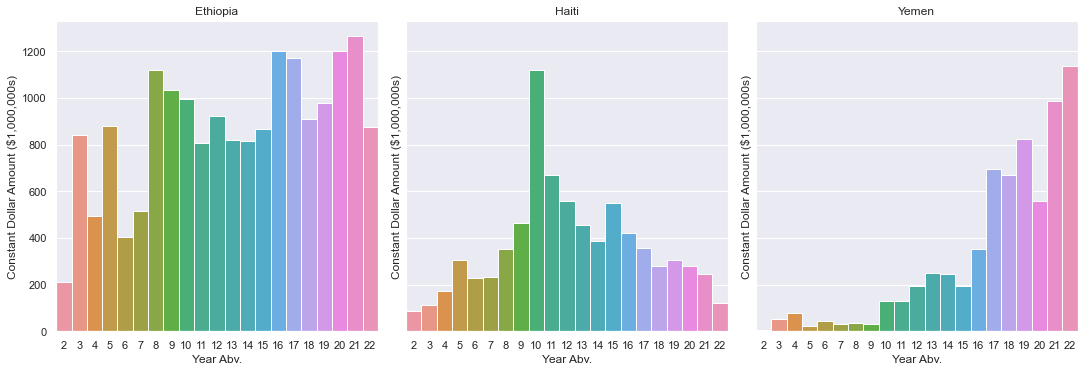

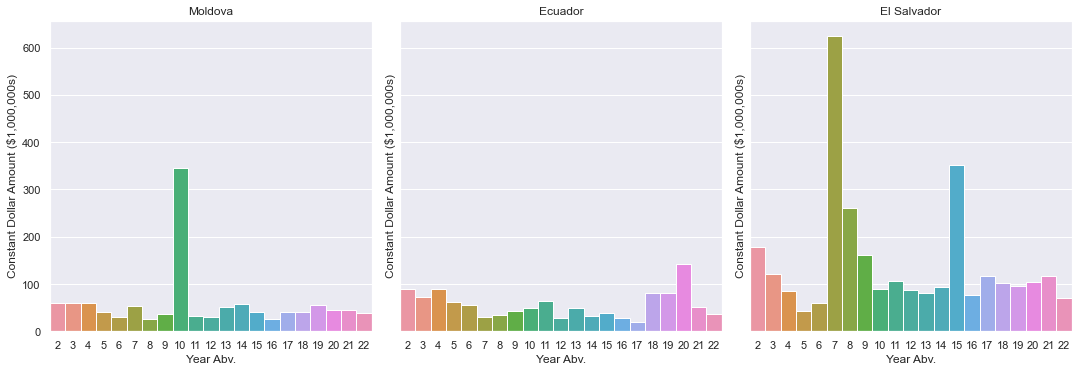

In [23]:
fig1, axes1 = plt.subplots(1, 3, figsize=(15,5) , sharey= True)
fig1.tight_layout(h_pad= 5)

sns.barplot(country_by_fiscal_yr[0], x= 'Year Abv.', y= 'Constant Dollar Amount ($1,000,000s)', ax= axes1[0], width= 1, errorbar= None).set_title('Ethiopia')
sns.barplot(country_by_fiscal_yr[5], x= 'Year Abv.', y= 'Constant Dollar Amount ($1,000,000s)', ax= axes1[1], width= 1, errorbar= None).set_title('Haiti')
sns.barplot(country_by_fiscal_yr[2], x= 'Year Abv.', y= 'Constant Dollar Amount ($1,000,000s)', ax= axes1[2], width= 1, errorbar= None).set_title('Yemen')


fig2, axes2 = plt.subplots(1, 3, figsize=(15,5) , sharey= True)
fig2.tight_layout(h_pad= 5)

sns.barplot(country_by_fiscal_yr[1], x= 'Year Abv.', y= 'Constant Dollar Amount ($1,000,000s)', ax= axes2[0], width= 1, errorbar= None).set_title('Moldova')
sns.barplot(country_by_fiscal_yr[3], x= 'Year Abv.', y= 'Constant Dollar Amount ($1,000,000s)', ax= axes2[1], width= 1, errorbar= None).set_title('Ecuador')
sns.barplot(country_by_fiscal_yr[4], x= 'Year Abv.', y= 'Constant Dollar Amount ($1,000,000s)', ax= axes2[2], width= 1, errorbar= None).set_title('El Salvador')


Graph 1: Constant Dollar Amount in $1,000,000 of Foreign Aid by Fiscal Year. The countries are separated in groups of 3 for scale purposes.

#### Analysis of Foreign Aid Amounts
The countries chosen represent two distinct groups. One group that receives a vary large amount of foreign aid and one that receives less, but still a significant amount of aid. There is a noticable upward trend in Ethiopia and a peak in Haiti around 2010. The upward trend in Ethiopia is most likely due to a combination of drought, famine, civil unrest, and a civil war. Similarly, Yemen receives the a large amount of US aid in recent years due to the ourbreak of the Yemeni Civil War in late 2014, demarking the upward trend.

### Visualizing Foreign Aid by Agency
Next, let's examine which agencies give the most aid. This will allow us to determine which category, health or economic, the country receives the most aid in. 

In [24]:
# Get the top 5 agencies by money spent 

country_by_funding_agency = []
for i, country  in enumerate(countries):
    # Groupby funding agency to get money spent per agency.
    country_by_funding_agency.append(pd.DataFrame(country.groupby('Funding Agency Acronym')['Constant Dollar Amount ($1,000,000s)'].sum()))
    country_by_funding_agency[i].reset_index(inplace=True) # Reset index for plotting
    
    # Sort and locate the top 3 agencies by money spent
    country_by_funding_agency[i] = country_by_funding_agency[i].sort_values(ascending= False, by= 'Constant Dollar Amount ($1,000,000s)')
    country_by_funding_agency[i] = country_by_funding_agency[i].iloc[0:3] 

Text(0.5, 1.0, 'El Salvador')

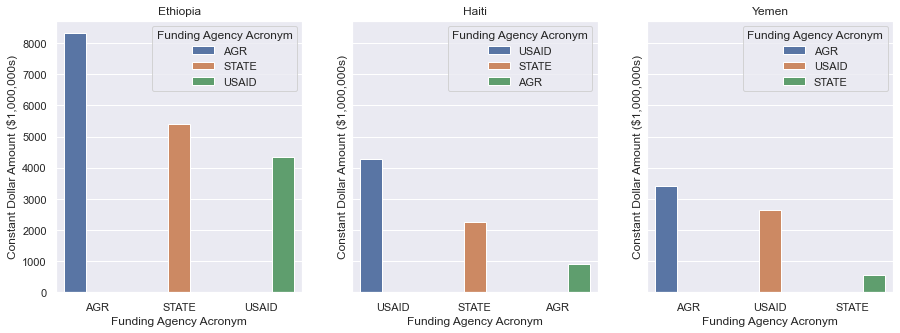

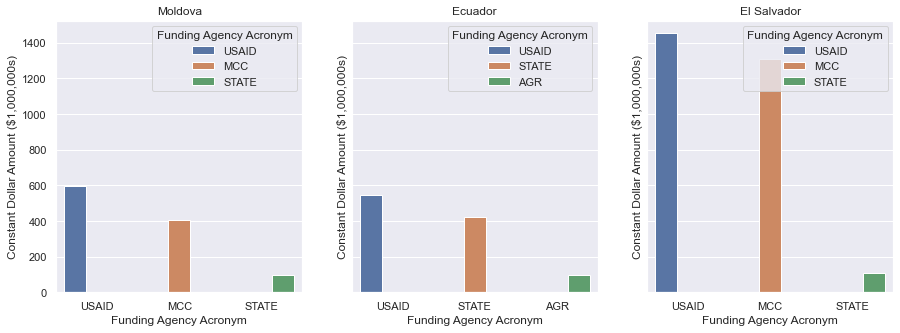

In [25]:
# Plotting the top 3 agencies by money spent
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey= True)


sns.barplot(data= country_by_funding_agency[0] , x= 'Funding Agency Acronym', y= 'Constant Dollar Amount ($1,000,000s)', hue= 'Funding Agency Acronym' , ax= axes[0]).set_title('Ethiopia')
sns.barplot(data= country_by_funding_agency[5] , x= 'Funding Agency Acronym', y= 'Constant Dollar Amount ($1,000,000s)', hue= 'Funding Agency Acronym' , ax= axes[1]).set_title('Haiti')
sns.barplot(data= country_by_funding_agency[2] , x= 'Funding Agency Acronym', y= 'Constant Dollar Amount ($1,000,000s)', hue= 'Funding Agency Acronym' , ax= axes[2]).set_title('Yemen')


fig1, axes1 = plt.subplots(1, 3, figsize=(15,5), sharey= True)
sns.barplot(data= country_by_funding_agency[1] , x= 'Funding Agency Acronym', y= 'Constant Dollar Amount ($1,000,000s)', hue= 'Funding Agency Acronym' ,ax= axes1[0]).set_title('Moldova')
sns.barplot(data= country_by_funding_agency[3] , x= 'Funding Agency Acronym', y= 'Constant Dollar Amount ($1,000,000s)', hue= 'Funding Agency Acronym' ,ax= axes1[1]).set_title('Ecuador')
sns.barplot(data= country_by_funding_agency[4] , x= 'Funding Agency Acronym', y= 'Constant Dollar Amount ($1,000,000s)', hue= 'Funding Agency Acronym' ,ax= axes1[2]).set_title('El Salvador')


Graph 2: Constant Dollar Amount in millions vs Funding Agency. The countries are separated in groups of 3 for scale purposes.
#### Analysis of Aid per Agency
We see four main aid agencies:
* USAID: US Agency for International Development 
* AGR: Department of Agriculture
* STATE: Department of State
* MCC: Millenium Challenge Corporation (for more info: see https://www.mcc.gov/)

See appendix for more information


## GW13 EDA
To highlight and explore the GW13 dataset, we are going to show how the five indicators change over time for Ecuador, and find vizualize life expectancy for every country over time.



Text(0.5, 1.0, 'Under Five Mortality Rate')

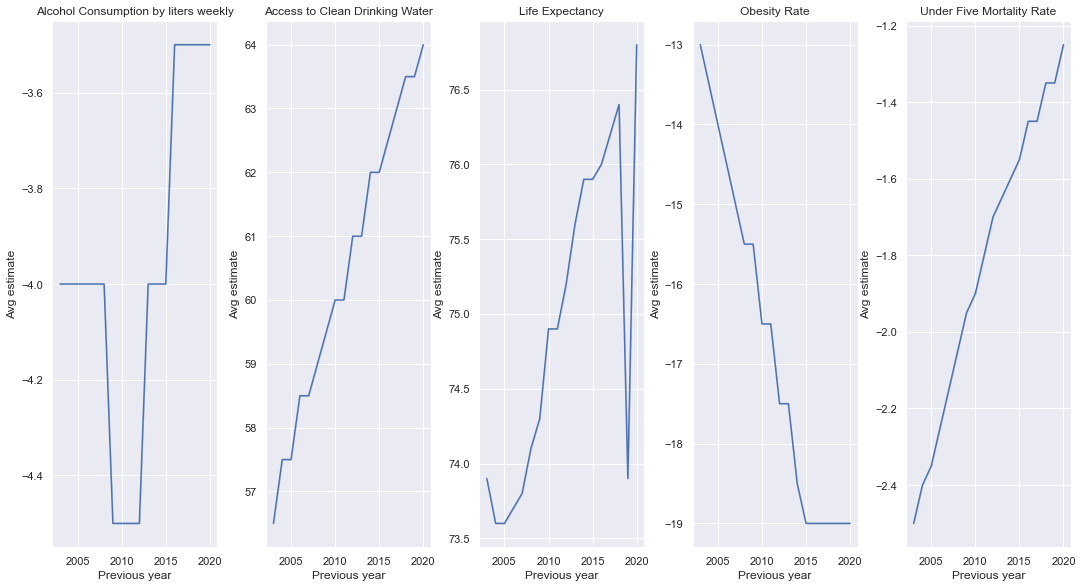

In [26]:
alc_dataset = final_dataset[final_dataset["indicator_abbr"] == "alcohol"]
alc_dataset = alc_dataset[alc_dataset["setting"] == "Ecuador"]

hh_dataset = final_dataset[final_dataset["indicator_abbr"] == "hh"]
hh_dataset = hh_dataset[hh_dataset["setting"] == "Ecuador"]

life_dataset = final_dataset[final_dataset["indicator_abbr"] == "life"]
life_dataset = life_dataset[life_dataset["setting"] == "Ecuador"]

obesity_dataset = final_dataset[final_dataset["indicator_abbr"] == "obesitya"]
obesity_dataset = obesity_dataset[obesity_dataset["setting"] == "Ecuador"]

U5_dataset = final_dataset[final_dataset["indicator_abbr"] == "u5mr"]
U5_dataset = U5_dataset[U5_dataset["setting"] == "Ecuador"]


fig3, axes3 = plt.subplots(1, 5, figsize=(15,8), sharey= False)
fig3.tight_layout()
    
sns.lineplot(data= alc_dataset, x = "Previous year", y= "Avg estimate", ax=axes3[0]).set_title('Alcohol Consumption by liters weekly')
sns.lineplot(data= hh_dataset, x = "Previous year", y= "Avg estimate", ax=axes3[1]).set_title('Access to Clean Drinking Water')
sns.lineplot(data= life_dataset, x = "Previous year", y= "Avg estimate", ax=axes3[2]).set_title('Life Expectancy')
sns.lineplot(data= obesity_dataset, x = "Previous year", y= "Avg estimate", ax=axes3[3]).set_title('Obesity Rate')
sns.lineplot(data= U5_dataset, x = "Previous year", y= "Avg estimate", ax=axes3[4]).set_title('Under Five Mortality Rate')

Graph 3: Average estimate of each indicator versus the year. Differentiated by indicator. 

Since the early 2000s, all indicators except for obesity have increased since the early 2000s, meaning that based on these indicators, Ecuador's overall health should be increasing. Next, we are going to look at the life expectancy for all our countries over time.

Text(0.5, 1.0, 'Life Expectancy by Country')

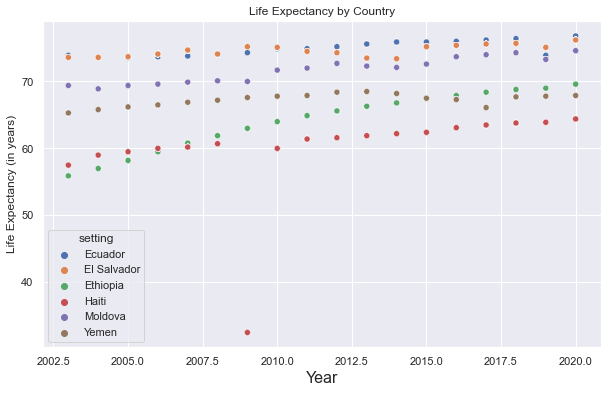

In [27]:
life_df = final_dataset[final_dataset["indicator_abbr"] == "life"]

fig4, ax4 = plt.subplots(figsize=(10,6))
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)

ax4.set_xlabel('Year', fontsize=16)
ax4.set_ylabel('Life Expectancy (in years)', fontsize=12)

sns.scatterplot(data= life_df, x = "Previous year", y= "Avg estimate", hue="setting", ax=ax4).set_title('Life Expectancy by Country')

Graph 4: Life Expectancy versus year. Points colored by country.

Generally, life expectancies have increased over time, with an outlier point in Haiti, which comes from the devastating earthquake in 2010, estimated to kill between 100k-300k people which brings the average life expectancy very significantly.

___

<div style="text-align: center;">
    <h2>Modeling and Analysis</h2>
</div>


Now that we have collected, cleaned, transformed, and explored the data it is time to attempt to answer the questions which we set out to answer.

Those questions are:
* Does a $1 dollar increase in aid to one country increase health indicators more or less than different country?
* Since US agencies have budgets set by Congress, how can they better utilize a limited budget with the maximum impact?
* Is change in an indicator dependent on marginal dollar increases per agency?


To answer these questions, we are going to turn to machine learning to learn our data and predict new values based on our data. We are going to use a simple linear regression to fit our model. We are working under the assumption that increased aid leads to general heath improvement. It is for this reason that we chose a simple linear regression as our predictor of choice. 

We opt to separate the indicators into their own models based on previous conclusions and under the assumption that the chosen indicators have no predictive value on each other. 

In [28]:
# IMPORTS for model
import sklearn
import sklearn.datasets
assert sklearn.__version__ >= "0.20"

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


First, we're going to get the X and y data for the model. This will consist of the country('setting), the year before, which corresponds to the constant dollar amount, the indicator name in question, the agency who is funding the aid, and the amount they are contributing each year. Our predictor value will be the average estimate gathered from the GW13 dataset.

In [29]:
final_dataset['indicator_name'].unique()

array(['Total alcohol per capita consumption in adults aged 15+ (litres of pure alcohol)',
       'Population using safely managed drinking water services (%)',
       'Life Expectancy', 'Obesity prevalence among adults (%)',
       'Under-five mortality rate'], dtype=object)

### Under-Five Mortality

In [30]:
model_df_under5 = final_dataset[final_dataset['indicator_name'] == 'Under-five mortality rate']

In [31]:

X_under5 = model_df_under5[['setting' ,'Previous year', 'indicator_name', 'Funding Agency Acronym', 'Constant Dollar Amount']]

X_under5 = pd.get_dummies(X_under5)

y_under5 = model_df_under5[['Avg estimate']]

Next, we're going to create the train, validation, and test sets. After that, we're going to fit and predict our model on the final test set. Previous adjustments to the code were done on the validation sets. 

In [32]:
X_train_full_5, X_test_5, y_train_full_5, y_test_5 = train_test_split(X_under5, y_under5, test_size=0.2, random_state=0) 
#X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=0)

model_under5 = LinearRegression()
model_under5.fit(X_train_full_5, y_train_full_5)

predicts_under5 = model_under5.predict(X_test_5)

mae_5 = mean_absolute_error(predicts_under5, y_test_5)
print('Model MAE: ', mae_5)

Model MAE:  0.7939630674179425


Since the estimate is measured in terms of %, we can see from our MAE that for our under 5 mortality model is on average 0.8% off from the actual estimate.

#### Analyzing our Coefficients

In [33]:
print('model intercept:', model_under5.intercept_)
coef = model_under5.coef_
coef_series = pd.DataFrame(coef, columns= X_under5.columns).iloc[0]

coef_series

model intercept: [-334.99343318]


Previous year                               1.641884e-01
Constant Dollar Amount                     -8.976341e-10
setting_Ecuador                             2.913816e+00
setting_El Salvador                         2.815697e+00
setting_Ethiopia                           -3.396224e+00
setting_Haiti                              -3.691152e+00
setting_Moldova                             2.996126e+00
setting_Yemen                              -1.638263e+00
indicator_name_Under-five mortality rate   -2.950973e-13
Funding Agency Acronym_ADF                 -5.479094e-02
Funding Agency Acronym_AGR                  2.363689e-01
Funding Agency Acronym_DFC                 -1.313218e-01
Funding Agency Acronym_DOC                  4.663931e-02
Funding Agency Acronym_DOE                 -7.308902e-02
Funding Agency Acronym_DOL                 -9.569459e-02
Funding Agency Acronym_DOT                 -7.000630e-02
Funding Agency Acronym_EPA                 -9.678340e-02
Funding Agency Acronym_FTC     

Each coefficient (Beta) represents the difference in the predicted value of y (the average estimate of under 5 mortality) for each unit difference in the corresponding feature, if the other features stay constant. In essence, this means that if X increases or decreases by one unit, the average estimate of under 5 mortality will change by beta units. 


**Most impactful agency** 

In [34]:
coef_series.loc[coef_series.index[9:]].idxmax()

'Funding Agency Acronym_AGR'

### Total alcohol per capita consumption in adults aged 15+ (litres of pure alcohol)

In [35]:
model_df_alc = final_dataset[final_dataset['indicator_name'] == 'Total alcohol per capita consumption in adults aged 15+ (litres of pure alcohol)']

In [36]:

X_alc = model_df_alc[['setting' ,'Previous year', 'indicator_name', 'Funding Agency Acronym', 'Constant Dollar Amount']]

X_alc = pd.get_dummies(X_alc)

y_alc = model_df_alc[['Avg estimate']]

Next, we're going to create the train, validation, and test sets. After that, we're going to fit and predict our model on the final test set. Previous adjustments to the code were done on the validation sets. 

In [37]:
X_train_full_alc, X_test_alc, y_train_full_alc, y_test_alc = train_test_split(X_alc, y_alc, test_size=0.2, random_state=0) 

model_alc = LinearRegression()
model_alc.fit(X_train_full_alc, y_train_full_alc)

predicts_alc = model_alc.predict(X_test_alc)

mae_alc = mean_absolute_error(predicts_alc, y_test_alc)

print('Model MAE: ', mae_alc)

Model MAE:  0.7150067905165692


Since the estimate is measured in terms of %, we can see from our MAE that for our alcohol consumption model is on average 0.7 liters/week off from the actual estimate.

#### Analyzing our Coefficients

In [38]:
print('model intercept:', model_alc.intercept_)
coef_alc = model_alc.coef_
coef_series_alc = pd.DataFrame(coef_alc, columns= X_alc.columns).iloc[0]

coef_series_alc

model intercept: [66811.77084927]


Previous year                                                                                      4.702956e-02
Constant Dollar Amount                                                                            -1.959743e-10
setting_Ecuador                                                                                   -5.120683e+04
setting_El Salvador                                                                               -5.120686e+04
setting_Ethiopia                                                                                  -5.120428e+04
setting_Haiti                                                                                     -5.120615e+04
setting_Moldova                                                                                   -5.121600e+04
setting_Yemen                                                                                     -5.120334e+04
indicator_name_Total alcohol per capita consumption in adults aged 15+ (litres of pure alcohol)   -2.096

**Most impactful agency** 

In [39]:
coef_series_alc.loc[coef_series_alc.index[9:]].idxmax()

'Funding Agency Acronym_LIC'

### Life Expectancy

In [40]:
model_df_life = final_dataset[final_dataset['indicator_name'] == 'Life Expectancy']

In [41]:

X_life = model_df_life[['setting' ,'Previous year', 'indicator_name', 'Funding Agency Acronym', 'Constant Dollar Amount']]

X_life = pd.get_dummies(X_life)

y_life = model_df_life[['Avg estimate']]

Next, we're going to create the train, validation, and test sets. After that, we're going to fit and predict our model on the final test set. Previous adjustments to the code were done on the validation sets. 

In [42]:
X_train_full_life, X_test_life, y_train_full_life, y_test_life = train_test_split(X_life, y_life, test_size=0.2, random_state=0) 

model_life = LinearRegression()
model_life.fit(X_train_full_life, y_train_full_life)

predicts_life = model_life.predict(X_test_life)

mae_life = mean_absolute_error(predicts_life, y_test_life)

print('Model MAE: ', mae_life)

Model MAE:  1.417628075090378


Since the estimate is measured in terms of %, we can see from our MAE that for our life expectancy model is on average 1.4% off from the actual estimate.

#### Analyzing our Coefficients

In [43]:
print('model intercept:', model_life.intercept_)
coef_life = model_life.coef_
coef_series_life = pd.DataFrame(coef_life, columns= X_life.columns).iloc[0]

coef_series_life

model intercept: [-601.1450395]


Previous year                     3.330160e-01
Constant Dollar Amount           -2.456692e-10
setting_Ecuador                   6.157495e+00
setting_El Salvador               5.878514e+00
setting_Ethiopia                 -4.656828e+00
setting_Haiti                    -8.868725e+00
setting_Moldova                   2.972411e+00
setting_Yemen                    -1.482869e+00
indicator_name_Life Expectancy    1.102363e-11
Funding Agency Acronym_ADF        2.217398e-01
Funding Agency Acronym_AGR       -6.162779e-02
Funding Agency Acronym_DFC        4.141932e-02
Funding Agency Acronym_DOC       -4.427920e-02
Funding Agency Acronym_DOE        9.325349e-02
Funding Agency Acronym_DOL        3.807095e-01
Funding Agency Acronym_DOT       -1.131225e-01
Funding Agency Acronym_EPA        3.023259e-01
Funding Agency Acronym_FTC        8.684618e-03
Funding Agency Acronym_HHS       -5.281699e-02
Funding Agency Acronym_IAF       -8.964368e-02
Funding Agency Acronym_LIC       -1.419951e-01
Funding Agenc

**Most impactful agency** 

In [44]:
coef_series_life.loc[coef_series_life.index[9:]].idxmax()

'Funding Agency Acronym_DOL'

### Obesity prevalence among adults 

In [45]:
model_df_obesity = final_dataset[final_dataset['indicator_name'] == 'Obesity prevalence among adults (%)']

In [46]:

X_obesity = model_df_obesity[['setting' ,'Previous year', 'indicator_name', 'Funding Agency Acronym', 'Constant Dollar Amount']]

X_obesity = pd.get_dummies(X_obesity)

y_obesity = model_df_obesity[['Avg estimate']]

Next, we're going to create the train, validation, and test sets. After that, we're going to fit and predict our model on the final test set. Previous adjustments to the code were done on the validation sets. 

In [47]:
X_train_full_obesity , X_test_obesity , y_train_full_obesity , y_test_obesity  = train_test_split(X_obesity, y_obesity, test_size=0.2, random_state=0) 

model_obesity = LinearRegression()
model_obesity.fit(X_train_full_obesity, y_train_full_obesity)

predicts_obesity = model_obesity.predict(X_test_obesity)

mae_obesity = mean_absolute_error(predicts_obesity, y_test_obesity)

print('Model MAE: ', mae_obesity)

Model MAE:  0.6402113938277064


Since the estimate is measured in terms of %, we can see from our MAE that our for obesity model is on average 0.64% off from the actual estimate.

#### Analyzing our Coefficients

In [48]:
print('model intercept:', model_obesity.intercept_)
coef_obesity = model_obesity.coef_
coef_series_obesity = pd.DataFrame(coef_obesity, columns= X_obesity.columns).iloc[0]

coef_series_obesity

model intercept: [-58528.51579634]


Previous year                                        -3.836628e-01
Constant Dollar Amount                               -1.084526e-09
setting_Ecuador                                       4.431821e+04
setting_El Salvador                                   4.431547e+04
setting_Ethiopia                                      4.433195e+04
setting_Haiti                                         4.431861e+04
setting_Moldova                                       4.431695e+04
setting_Yemen                                         4.432337e+04
indicator_name_Obesity prevalence among adults (%)    2.118422e-01
Funding Agency Acronym_ADF                            1.496509e+04
Funding Agency Acronym_AGR                            1.496519e+04
Funding Agency Acronym_DFC                            1.496513e+04
Funding Agency Acronym_DOC                            1.496509e+04
Funding Agency Acronym_DOE                            1.496507e+04
Funding Agency Acronym_DOL                            1.496510

**Most impactful agency** 

In [49]:
coef_series_obesity.loc[coef_series_obesity.index[9:]].idxmax()

'Funding Agency Acronym_AGR'

### Population using safely managed drinking water services (%)

In [50]:
model_df_water = final_dataset[final_dataset['indicator_name'] == 'Population using safely managed drinking water services (%)']

In [51]:

X_water = model_df_water[['setting' ,'Previous year', 'indicator_name', 'Funding Agency Acronym', 'Constant Dollar Amount']]

X_water = pd.get_dummies(X_water)

y_water = model_df_water[['Avg estimate']]

Next, we're going to create the train, validation, and test sets. After that, we're going to fit and predict our model on the final test set. Previous adjustments to the code were done on the validation sets. 

In [52]:
X_train_full_water, X_test_water, y_train_full_water, y_test_water = train_test_split(X_water, y_water, test_size=0.2, random_state=0) 

model_water = LinearRegression()
model_water.fit(X_train_full_water, y_train_full_water)

predicts_water = model_water.predict(X_test_water)

mae_water = mean_absolute_error(predicts_water, y_test_water)
print('Model MAE: ', mae_water)

Model MAE:  0.7150255979554182


Since the estimate is measured in terms of %, we can see from our MAE that our for life expectancy model is on average 1.4 years off from the actual estimate.

#### Analyzing our Coefficients

In [53]:
print('model intercept:', model_water.intercept_)
coef_water = model_water.coef_
coef_series_water = pd.DataFrame(coef_water, columns= X_water.columns).iloc[0]

coef_series_water

model intercept: [-31476.12485025]


Previous year                                                                 1.075276e-01
Constant Dollar Amount                                                        4.517550e-10
setting_Ecuador                                                               2.493492e+04
setting_El Salvador                                                           2.487432e+04
setting_Ethiopia                                                              2.489409e+04
setting_Haiti                                                                 2.487433e+04
setting_Moldova                                                               2.487436e+04
setting_Yemen                                                                 2.487433e+04
indicator_name_Population using safely managed drinking water services (%)    8.792498e-01
Funding Agency Acronym_ADF                                                    6.384674e+03
Funding Agency Acronym_AGR                                                    6.384605e+03

**Most impactful agency** 

In [54]:
coef_series_water.loc[coef_series_water.index[9:]].idxmax()

'Funding Agency Acronym_HHS'

### Analysis

In [55]:
from tabulate import tabulate

print(tabulate([['Health Indicator','Most impactful agencies', 'Model Error'], 
        ['Under-five mortality rate', coef_series.loc[coef_series.index[9:]].idxmax(), mae_5],
        ['Total alcohol per capita consumption in adults aged 15+ (litres of pure alcohol)',coef_series_alc.loc[coef_series_alc.index[9:]].idxmax(), mae_alc],
        [ 'Life Expectancy', coef_series_life.loc[coef_series_life.index[9:]].idxmax(), mae_life],
        ['Obesity prevalence among adults (%)', coef_series_obesity.loc[coef_series_obesity.index[9:]].idxmax(), mae_obesity],
        ['Population using safely managed drinking water services (%)', coef_series_water.loc[coef_series_water.index[9:]].idxmax(), mae_water]], 
        headers='firstrow', tablefmt= 'simple_grid'
    ))

ModuleNotFoundError: No module named 'tabulate'

<div style="text-align: center;">
    <h2>Conclusion</h2>
</div>

Have we  gathered enough evidence to answer the questions we set out to answer? 

* How does US foreign aid impact the overall health of a country?
* Does a $1 marginal dollar increase to one country increase health indicators more or less than different country?
* Since US agencies have budgets set by Congress, how can they better utilize a limited budget with the maximum impact?
* Is change in an indicator dependent on marginal dollar increases per agency?


#### How does US foreign aid impact the overall health of a country?
In all predictions, the model intercepts were less than zero indicating that in the absence of all foreign aid, the model predicts the indicator will decrease.

<div style="text-align: center;">
    <h2>Appendix</h2>
</div>

### Funding Agency Acronyms

AGR: Department of Agriculture

USAID: US Agency for International Development

STATE: Department of State

MCC: Millennium (for more info: https://www.mcc.gov/)

HHS: Department of Health and Human Services

LIC: Open World Leadership Center (for more info: https://www.openworld.gov/)

ADF: US African Development Foundation

DFC: US International Development Finance Corporation

DOC: Department of Commerce

DOE: Department of Energy

DOL: Department of Labor

DOT: Department of Transportation

EPA: US Environmental Protection Agency

FTC: US Federal Trade Comission

IAF: US Inter-American Foundation (for more info: https://www.iaf.gov/)

NSF: US National Science Foundation

PC : Peace Corps

TDA: US Trade and Development Agency

TREAS: Department of the Treasury

